In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-1000-instagrammers-world-cleaned/top_1000_instagrammers.csv


# introduction

Instagram[a] is a photo and video sharing social networking service founded in 2010 by Kevin Systrom and Mike Krieger, and later acquired by American company Facebook Inc. The app allows users to upload media that can be edited with filters and organized by hashtags and geographical tagging. Posts can be shared publicly or with preapproved followers. Users can browse other users' content by tag and location, view trending content, like photos, and follow other users to add their content to a personal feed.

This dataset comprises of the details of top 1000 influencers in instagram

To be able to find commonalities among more than 100M accounts and use these characteristics to predict the number of followers of other accounts

## Dataset

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

df = pd.read_csv("../input/top-1000-instagrammers-world-cleaned/top_1000_instagrammers.csv")
df.columns = [c.replace(' ', '_') for c in df.columns]
df.columns = [c.replace('.', '') for c in df.columns]
df.head()

,Name,Rank,Category,Followers,Audience_Country,Authentic_Engagement,Engagement_Avg
0,cristiano,1,Sports with a ball,462.9M,India,5.5M,6.6M
1,leomessi,2,Sports with a ballFamily,347.2M,Argentina,3.6M,4.8M
2,kendalljenner,3,ModelingFashion,247.6M,United States,3M,4.9M
3,arianagrande,4,Music,321.4M,United States,2.4M,3.4M
4,zendaya,5,Cinema & Actors/actressesFashion,147M,United States,4.3M,5.8M


In [3]:
df.shape

(1000, 7)

## Data process

In [4]:
from numpy import nan
import logging 
# transfer string to float
colums = ["Followers","Authentic_Engagement","Engagement_Avg"]    
content_list=[]
for label,content in df.items():
    if(label in colums):
        content = content.replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(float)
        content_list.append(content)
df = df.assign(Followers= content_list[0],Authentic_Engagement= content_list[1],Engagement_Avg= content_list[2])


In [5]:
df.head()

,Name,Rank,Category,Followers,Audience_Country,Authentic_Engagement,Engagement_Avg
0,cristiano,1,Sports with a ball,462900000.0,India,5500000.0,6600000.0
1,leomessi,2,Sports with a ballFamily,347200000.0,Argentina,3600000.0,4800000.0
2,kendalljenner,3,ModelingFashion,247600000.0,United States,3000000.0,4900000.0
3,arianagrande,4,Music,321400000.0,United States,2400000.0,3400000.0
4,zendaya,5,Cinema & Actors/actressesFashion,147000000.0,United States,4300000.0,5800000.0


In [6]:
df_dummy = pd.get_dummies(df,columns= ['Category','Audience_Country'])
df_dummy.head()

,Name,Rank,Followers,Authentic_Engagement,Engagement_Avg,Category_Adult content,Category_Animals,Category_Art/Artists,Category_Art/ArtistsBeauty,Category_Art/ArtistsCinema & Actors/actresses,...,Audience_Country_Russia,Audience_Country_Senegal,Audience_Country_South Korea,Audience_Country_Spain,Audience_Country_Syria,Audience_Country_Thailand,Audience_Country_Turkey,Audience_Country_United Arab Emirates,Audience_Country_United Kingdom,Audience_Country_United States
0,cristiano,1,462900000.0,5500000.0,6600000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,leomessi,2,347200000.0,3600000.0,4800000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,kendalljenner,3,247600000.0,3000000.0,4900000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,arianagrande,4,321400000.0,2400000.0,3400000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,zendaya,5,147000000.0,4300000.0,5800000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(df['Followers'], df_dummy[['Rank',
       'Authentic_Engagement','Engagement_Avg','Audience_Country_United States','Category_Music']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Followers   R-squared (uncentered):                   0.268
Model:                            OLS   Adj. R-squared (uncentered):              0.264
Method:                 Least Squares   F-statistic:                              72.79
Date:                Mon, 05 Dec 2022   Prob (F-statistic):                    5.24e-65
Time:                        04:28:41   Log-Likelihood:                         -19014.
No. Observations:                1000   AIC:                                  3.804e+04
Df Residuals:                     995   BIC:                                  3.806e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Rank                            3217.3064   2793.779      1.152      0.250   -2265.069    8699.682
Authentic_Engagement             -13.8679      5.532     -2.507      0.012     -24.724      -3.012
Engagement_Avg                    25.1721      4.803      5.241      0.000      15.747      34.597
Audience_Country_United States  1.657e+07   3.11e+06      5.326      0.000    1.05e+07    2.27e+07
Category_Music                  1.165e+07   3.66e+06      3.185      0.001    4.47e+06    1.88e+07
==============================================================================
Omnibus:                     1035.518   Durbin-Watson:                   1.392
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63344.747
Skew:                           4.884   Prob(JB):                         0.00
Kurtosis:                      40.747   Cond. No.                     4.66e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## add new colum :Followers>100M

In [8]:
list_temp = []
for label,content in df.items():
    if(label !='Followers'): continue
    for obj in content:
        if(obj>100000000.0):
            list_temp.append(1)
        else:
            list_temp.append(0)

df = df.assign(FollowersBigger100M=list_temp)

In [9]:
df.eval('Authentic_Engagement =Authentic_Engagement/Followers',inplace= True) 
df.eval('Engagement_Avg =Engagement_Avg/Followers',inplace= True) 

In [10]:
df.head()

,Name,Rank,Category,Followers,Audience_Country,Authentic_Engagement,Engagement_Avg,FollowersBigger100M
0,cristiano,1,Sports with a ball,462900000.0,India,0.011882,0.014258,1
1,leomessi,2,Sports with a ballFamily,347200000.0,Argentina,0.010369,0.013825,1
2,kendalljenner,3,ModelingFashion,247600000.0,United States,0.012116,0.019790,1
3,arianagrande,4,Music,321400000.0,United States,0.007467,0.010579,1
4,zendaya,5,Cinema & Actors/actressesFashion,147000000.0,United States,0.029252,0.039456,1


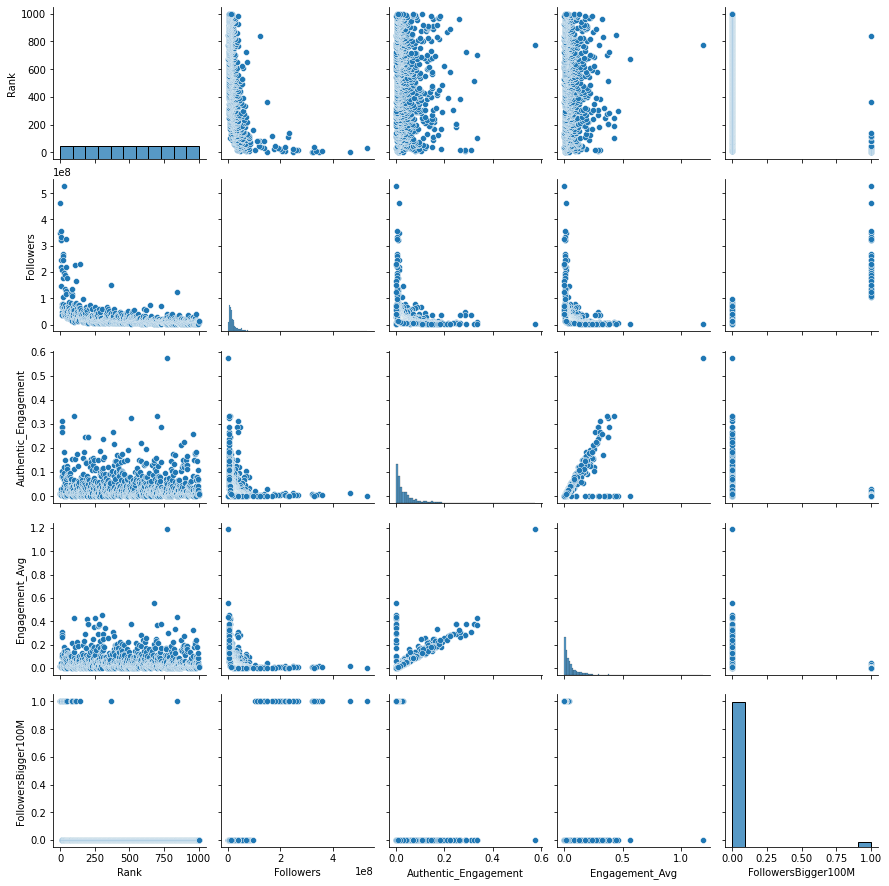

In [11]:
#pair plot to check the colinearity
sns.pairplot(df) 

From the pair plot and heat map, we can see that Authentic_Engagement and Engagement_Avg are corelated each other. 

In [12]:
df_dummy = pd.get_dummies(df,columns= ['Category','Audience_Country'])
df_dummy.head()

,Name,Rank,Followers,Authentic_Engagement,Engagement_Avg,FollowersBigger100M,Category_Adult content,Category_Animals,Category_Art/Artists,Category_Art/ArtistsBeauty,...,Audience_Country_Russia,Audience_Country_Senegal,Audience_Country_South Korea,Audience_Country_Spain,Audience_Country_Syria,Audience_Country_Thailand,Audience_Country_Turkey,Audience_Country_United Arab Emirates,Audience_Country_United Kingdom,Audience_Country_United States
0,cristiano,1,462900000.0,0.011882,0.014258,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,leomessi,2,347200000.0,0.010369,0.013825,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,kendalljenner,3,247600000.0,0.012116,0.019790,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,arianagrande,4,321400000.0,0.007467,0.010579,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,zendaya,5,147000000.0,0.029252,0.039456,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## 1.Linear Regression

In [13]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(df['Followers'], df_dummy[['Rank',
       'Authentic_Engagement','Engagement_Avg','Audience_Country_United States','Category_Music']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Followers   R-squared (uncentered):                   0.159
Model:                            OLS   Adj. R-squared (uncentered):              0.155
Method:                 Least Squares   F-statistic:                              37.71
Date:                Mon, 05 Dec 2022   Prob (F-statistic):                    1.74e-35
Time:                        04:28:47   Log-Likelihood:                         -19083.
No. Observations:                1000   AIC:                                  3.818e+04
Df Residuals:                     995   BIC:                                  3.820e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Rank                            7767.3990   3279.332      2.369      0.018    1332.198    1.42e+04
Authentic_Engagement            8.846e+07   4.72e+07      1.876      0.061   -4.06e+06    1.81e+08
Engagement_Avg                 -5.814e+07   3.07e+07     -1.892      0.059   -1.18e+08    2.15e+06
Audience_Country_United States   2.66e+07   3.22e+06      8.259      0.000    2.03e+07    3.29e+07
Category_Music                  2.026e+07   3.85e+06      5.256      0.000    1.27e+07    2.78e+07
==============================================================================
Omnibus:                     1080.235   Durbin-Watson:                   0.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70658.553
Skew:                           5.232   Prob(JB):                         0.00
Kurtosis:                      42.829   Cond. No.                     2.11e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## regression coefficients Interpretation

from the OLS Regression Results, we know that the value of **Rank**,**Authentic_Engagement,Audience_Country_United States, and Category_Music** increase, then mean of the dependent variable also tends to increase. the value of **Engagement_Avg** decrease, then mean of the dependent variable also tends to decrease.

# 2.Random Forest

## data preparation

In [14]:
# Use numpy to convert to arrays
import numpy as np
df_dummy_4automl= df_dummy.copy()
# Y are the values we want to predict
Y = np.array(df_dummy['Followers'])

# Remove the labels from the features
# axis 1 refers to the columns
df_dummy= df_dummy.drop('Followers', axis = 1)
df_dummy= df_dummy.drop('Name', axis = 1)
df_dummy= df_dummy.drop('FollowersBigger100M', axis = 1)
df_dummy= df_dummy.drop('Rank', axis = 1)
df_dummy= df_dummy.drop('Engagement_Avg', axis = 1)
# Saving feature names for later use
df_dummy_list = list(df_dummy.columns)

# Convert to numpy array
df_dummy = np.array(df_dummy)

## partition data

In [15]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_df, test_df, train_y, test_y = train_test_split(df_dummy, Y, test_size = 0.25,
                                                                           random_state = 42)

In [16]:
print('Training Features Shape:', train_df.shape)
print('Training Y Shape:', train_y.shape)
print('Testing Features Shape:', test_df.shape)
print('Testing Y Shape:', test_y.shape)

Training Features Shape: (750, 187)
Training Y Shape: (750,)
Testing Features Shape: (250, 187)
Testing Y Shape: (250,)


## fit model

In [17]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf  = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)
# Train the model on training data
rf.fit(train_df, train_y);

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


## Make Predictions on Test Data

In [18]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_df)

# Calculate the absolute errors
errors = abs(predictions - test_y)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 15403312.05 degrees.


In [19]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_y)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 33.87 %.


In [20]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = df_dummy_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png'); 

In [21]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 39


In [22]:
# Limit depth of tree to 2 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=42)
rf_small.fit(train_df, train_y)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = df_dummy_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

graph.write_png('small_tree.png');


all tree picture saved in file

## Node Interpretation

Based solely on this tree, we can make a prediction for any new data point. the root node included Authentic_engagement, squard_error, samples and value.Authentic_engagement is varibale and value to split node. squard_error is mean squard value of node. samples is the number of data point in this node. value is prediction from the model which is the number of follower of Instagrammer. 

Furthermore, notice that in our tree, there are only 2 variables we actually used to make a prediction! According to this particular decision tree, the rest of the features are not important for making a prediction.


## variable importance

In [23]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(df_dummy_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Authentic_Engagement Importance: 0.38
Variable: Category_Photography Importance: 0.11
Variable: Category_FashionModelingBeauty Importance: 0.07
Variable: Category_Cinema & Actors/actressesFitness & Gym Importance: 0.05
Variable: Category_FashionBeauty Importance: 0.05
Variable: Category_Sports with a ballFamily Importance: 0.04
Variable: Category_Clothing & OutfitsLifestyle Importance: 0.03
Variable: Category_MusicFashion Importance: 0.03
Variable: Category_MusicLifestyle Importance: 0.03
Variable: Category_Sports with a ball Importance: 0.03
Variable: Audience_Country_India Importance: 0.03
Variable: Audience_Country_United States Importance: 0.03
Variable: Category_Music       Importance: 0.02
Variable: Category_Cinema & Actors/actressesFashion Importance: 0.01
Variable: Category_Lifestyle   Importance: 0.01
Variable: Category_MusicCinema & Actors/actresses Importance: 0.01
Variable: Audience_Country_Argentina Importance: 0.01
Variable: Audience_Country_Brazil Importance: 0

# 2. Generalized AutoML Model

In [24]:
# Load the H2O library and start up the H2O cluter locally on your machine
import h2o

# Number of threads, nthreads = -1, means use all cores on your machine
# max_mem_size is the maximum memory (in GB) to allocate to H2O
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu120.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu120.04, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp5gswc6wj
  JVM stdout: /tmp/tmp5gswc6wj/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp5gswc6wj/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,2 months and 15 days
H2O_cluster_name:,H2O_from_python_unknownUser_5xikni
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [25]:
hf = h2o.H2OFrame(df_dummy_4automl)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [26]:
# Partition data into 70%, 15%, 15% chunks
# Setting a seed will guarantee reproducibility

splits = hf.split_frame(ratios=[0.7, 0.15], seed=1)  

train = splits[0]
valid = splits[1]
test = splits[2]

In [27]:
print(train.nrow)
print(valid.nrow)
print(test.nrow)

699
150
151


In [28]:
#df_dummy_4automl.head()

In [29]:
y = 'Followers'
x = hf.columns
x.remove(y)  #remove the response
x.remove('Rank')
x.remove('Engagement_Avg') 
x.remove('FollowersBigger100M')#remove the  column because it's correlated with the outcome
x

['Name',
 'Authentic_Engagement',
 'Category_Adult content',
 'Category_Animals',
 'Category_Art/Artists',
 'Category_Art/ArtistsBeauty',
 'Category_Art/ArtistsCinema & Actors/actresses',
 'Category_Art/ArtistsCinema & Actors/actressesMusic',
 'Category_Art/ArtistsCinema & Actors/actressesShows',
 'Category_Art/ArtistsFashionModeling',
 'Category_Art/ArtistsFashionMusic',
 'Category_Art/ArtistsShows',
 'Category_Beauty',
 'Category_BeautyArt/ArtistsCinema & Actors/actresses',
 'Category_BeautyCinema & Actors/actresses',
 'Category_BeautyCinema & Actors/actressesFashion',
 'Category_BeautyCinema & Actors/actressesModeling',
 'Category_BeautyFamilyLifestyle',
 'Category_BeautyHumor & Fun & HappinessCinema & Actors/actresses',
 'Category_BeautyLifestyle',
 'Category_BeautyLifestyleFashion',
 'Category_BeautyModelingAdult content',
 'Category_BeautyModelingCinema & Actors/actresses',
 'Category_Business & Careers',
 'Category_Business & CareersFinance & Economics',
 'Category_Cars & Motorb

In [30]:
# Import automl:
from h2o.automl import H2OAutoML
#create automl model
aml = H2OAutoML(max_models=10, seed=1)



In [31]:
#training model
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |
04:29:13.276: _train param, Dropping bad and constant columns: [Category_Cinema & Actors/actressesHumor & Fun & Happiness, Category_LifestyleCinema & Actors/actressesModeling, Category_Sports with a ballShows, Category_Finance & EconomicsBusiness & Careers, Category_Literature & JournalismTrainers & Coaches, Category_Humor & Fun & HappinessCinema & Actors/actresses, Audience_Country_Kazakhstan, Category_Cinema & Actors/actressesComics & sketches, Audience_Country_Pakistan, Category_Sports with a ballLifestyleKids & Toys, Name, Category_ShowsCinema & Actors/actressesModeling, Category_Animals, Category_ShowsCinema & Actors/actressesLifestyle, Category_ModelingFashionLifestyle, Category_BeautyCinema & Actors/actressesFashion, Category_MusicClothing & Outfits, Category_BeautyArt/ArtistsCinema & Actors/actresses, Category_BeautyHumor & Fun & HappinessCinema & Actors/actresses, Category_Computers & GadgetsBusiness & Careers, Category_Clothing & OutfitsMusic, Category_Mach

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_1_20221205_42913


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    23                 23                          8673                   7            7            7             12            34            25.2174

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 1400987146252026.8
RMSE: 37429762.839911595
MAE: 15983825.03576538
RMSLE: 0.6840368220958998
Mean Residual Deviance: 1400987146252026.8

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 1932185062130291.8
RMSE: 43956627.055886485
MAE: 18834662.679323833
RMSLE: 0.7885596959132166
Mean Residual Deviance: 1932185062130291.8

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     1.89622e+07  1.99314e+06  2.00014e+07   2.08028e+07   1.74173e+07   1.62766e+07   2.03128e+07
mean_residual_deviance  1.98344e+15  1.04372e+15  2.39338e+15   3.62865e+15   1.25873e+15   1.12797e+15   1.50849e+15
mse                     1.98344e+15  1.04372e+15  2.39338e+15   3.62865e+15   1.25873e+15   1.12797e+15   1.50849e+15
r2                      0.16632      0.0585108    0.197726      0.153193      0.175782      0.0747928     0.230106
residual_deviance       1.98344e+15  1.04372e+15  2.39338e+15   3.62865e+15   1.25873e+15   1.12797e+15   1.50849e+15
rmse                    4.34127e+07  1.11119e+07  4.89222e+07   6.02383e+07   3.54785e+07   3.35853e+07   3.88393e+07
rmsle                   0.783957     0.0139394    0.793014      0.760546      0.795947      0.785675      0.784603

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2022-12-05 04:29:36  2.539 sec   0                  4.90309e+07      2.30175e+07     2.40403e+15
    2022-12-05 04:29:36  2.621 sec   5                  4.3804e+07       1.93977e+07     1.91879e+15
    2022-12-05 04:29:37  2.693 sec   10                 4.12025e+07      1.78952e+07     1.69764e+15
    2022-12-05 04:29:37  2.765 sec   15                 3.92812e+07      1.69043e+07     1.54301e+15
    2022-12-05 04:29:37  2.873 sec   20                 3.80461e+07      1.62779e+07     1.44751e+15
    2022-12-05 04:29:37  2.965 sec   23                 3.74298e+07      1.59838e+07     1.40099e+15

Variable Importances: 
variable                               relative_importance    scaled_importance      percentage
-------------------------------------  ---------------------  ---------------------  ---------------------
Authentic_Engagement                   2.823688246884565e+18  1.0                    0.7640545303299557
Audience_Country_United States         4.904810733151191e+17  0.17370227533307803    0.1327180103968596
Audience_Country_India                 1.747230319926313e+17  0.061877592962115036   0.04727785522861697
Category_Sports with a ball            6.719438968376525e+16  0.02379667435238371    0.01818195684572544
Category_Music                         4.451016342765568e+16  0.015763129473221657   0.012043890486192657
Category_Cinema & Actors/actresses     3.229418336865485e+16  0.011436879904956117   0.008738399904221355
Audience_Country_Brazil                2.422431133414195e+16  0.008578960995736391   0.006554794014316378
Audience_Country_Argentina             1.890904449220608e+16  0.006696576547736397   0

In [32]:
lb = aml.leaderboard
lb.head(rows=lb.nrows) 

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_2_AutoML_1_20221205_42913,4.39566e+07,1.93219e+15,1.88347e+07,0.78856,1.93219e+15
GBM_3_AutoML_1_20221205_42913,4.41098e+07,1.94567e+15,1.92509e+07,0.797028,1.94567e+15
GBM_4_AutoML_1_20221205_42913,4.419e+07,1.95275e+15,1.88814e+07,0.804192,1.95275e+15
StackedEnsemble_BestOfFamily_1_AutoML_1_20221205_42913,4.42918e+07,1.96176e+15,1.91789e+07,0.813659,1.96176e+15
StackedEnsemble_AllModels_1_AutoML_1_20221205_42913,4.43611e+07,1.96791e+15,1.91937e+07,nan,1.96791e+15
GBM_1_AutoML_1_20221205_42913,4.52883e+07,2.05103e+15,1.98721e+07,0.848972,2.05103e+15
XGBoost_1_AutoML_1_20221205_42913,4.57606e+07,2.09403e+15,1.98922e+07,nan,2.09403e+15
XGBoost_2_AutoML_1_20221205_42913,4.62117e+07,2.13552e+15,2.05021e+07,nan,2.13552e+15
DRF_1_AutoML_1_20221205_42913,4.77e+07,2.27529e+15,1.77307e+07,0.772675,2.27529e+15
GLM_1_AutoML_1_20221205_42913,4.90803e+07,2.40887e+15,2.3019e+07,1.05966,2.40887e+15


# 3.model interpret

## Partial Dependence

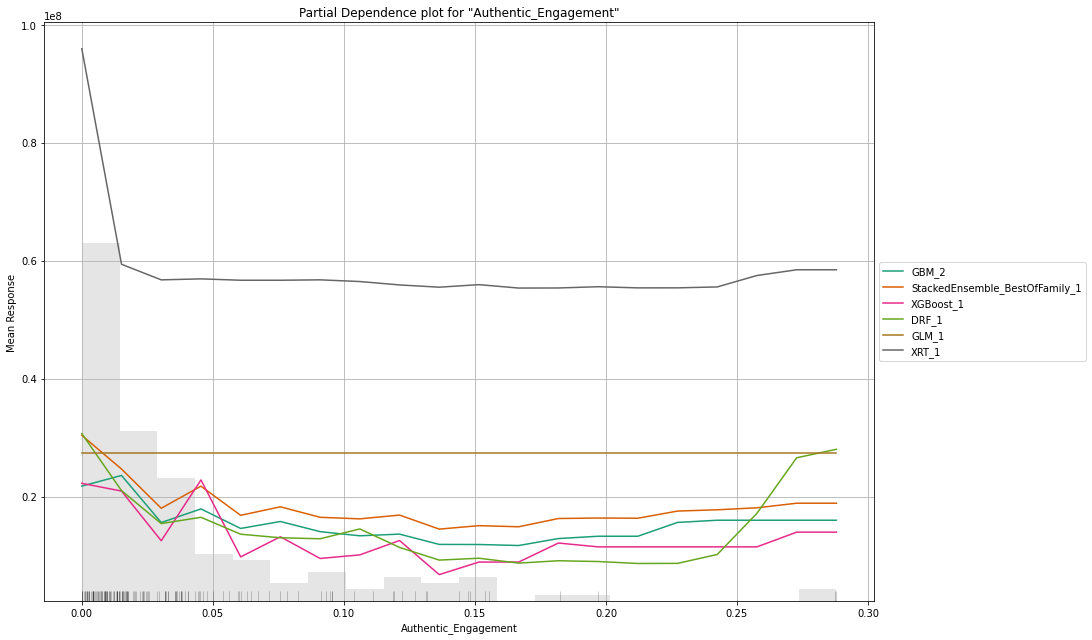

In [33]:
pd_plot = aml.pd_multi_plot(test, "Authentic_Engagement")

Partial dependence plots reflect the expected output of the model if we were to intervene and change exactly one of the model parameters. but there is a problem. A partial dependence plot has no vertical dispersion and so no indication of how much interaction effects are driving the model’s predictions.

## shap analysis

/opt/conda/lib/python3.7/site-packages/h2o/explanation/_explain.py:581: RuntimeWarning: invalid value encountered in true_divide
  res = (res - np.nanmin(res)) / (np.nanmax(res) - np.nanmin(res))


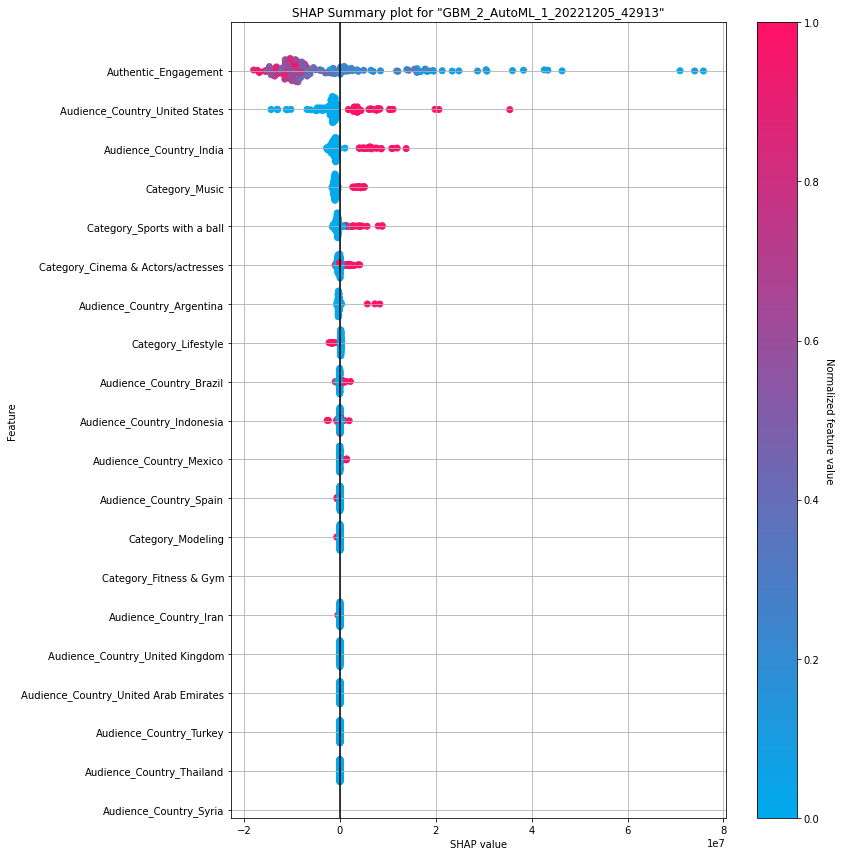

In [34]:
model= aml.get_best_model()
shap_plot = model.shap_summary_plot(test)

Observations:
the number of Follower is associated with the following characteristics:

low Authentic engagement

audience country among United States, India, and Argentina

category among Music, sports with a ball and Cinema&Actors/Actresses

In the summary plot, we see first indications of the relationship between the value of a feature and the impact on the prediction. But to see the exact form of the relationship, we have to look at SHAP dependence plots.

# Reference and license

Sckit learn offcial documentation

Eli5 official documentation

Refered Towards Data Science

H2o.ai official documentation

The algorithms were referred directly from the Sckit learn official documentation and h2o introduction.

Visualization was referred from Tutorials in Matplotlab documentation. 

SHAP Summary was referred from Tutorial in github: AISkunks/Klee/SHAP

The remaining code was written independently.

Copyright (c) 2022 Yu An

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.